In [1]:
import ampal
import isambard
import isambard.specifications as specs
import isambard.modelling as modelling
import isambard.optimisation.evo_optimizers as ev_opts
from isambard.optimisation.evo_optimizers import Parameter
import budeff

import matplotlib.pyplot as plt
import numpy as np
import itertools
from pprint import pprint
import nglview as nv
from contextlib import redirect_stdout

%matplotlib inline

In [2]:
def show_ball_and_stick(ampal):
    view = nv.show_text(ampal.pdb)
    view.add_ball_and_stick()
    view.remove_cartoon()
    return view

In [3]:
REGISTER_ADJUST = {
    'a': 0,
    'b': 102.8,
    'c': 205.6,
    'd': 308.4,
    'e': 51.4,
    'f': 154.2,
    'g': 257
}

In [4]:
specification = specs.CoiledCoil.from_parameters

In [5]:
sequences = ['GEIAALKQEIAALKKENAALKWEIAALKQGYY', 'GEIAALKQEIAALKKENAALKWEIAALKQGYY', 'GEIAALKQEIAALKKENAALKWEIAALKQGYY', 
             'GEIAALKQEIAALKKENAALKWEIAALKQGYY', 'GEIAALKQEIAALKKENAALKWEIAALKQGYY', 'GEIAALKQEIAALKKENAALKWEIAALKQGYY']

In [6]:
parameters = [
    Parameter.static('Oligomeric State', 6),
    Parameter.static('Helix Length', 32),
    Parameter.dynamic('Radius', 9.0, 1.0),
    Parameter.dynamic('Pitch', 250, 60),
    Parameter.dynamic('PhiCA', REGISTER_ADJUST['f'], 27),  
]

In [7]:
default_values = [x.default_value for x in parameters]
print(default_values)

[6, 32, 9.0, 250, 154.2]


In [8]:
def get_bude_total_energy(ampal_object):
    return budeff.get_internal_energy(ampal_object).total_energy

### Genetic Algorithm

In [9]:
opt_ga = ev_opts.GA(specification, sequences, parameters, get_bude_total_energy)

In [10]:
opt_ga.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max     
0  	70   	-2835.84	511.603	-3514.74	-1900.16
1  	78   	-3347.45	136.075	-3539.27	-3031.3 
2  	67   	-3462.07	50.1593	-3550.91	-3348.97
3  	71   	-3502.77	20.3313	-3550.91	-3456.82
4  	68   	-3522.72	13.7241	-3552.13	-3500   
5  	69   	-3533.68	12.2814	-3559.75	-3513.23
6  	65   	-3543.13	7.05366	-3559.75	-3527.18
7  	62   	-3547.38	5.60742	-3561.77	-3537.39
8  	82   	-3551.83	5.19074	-3561.77	-3543.22
9  	55   	-3555.31	4.30155	-3561.77	-3547.76
10 	69   	-3558.53	2.66606	-3565.62	-3552.99
11 	72   	-3559.8 	2.08646	-3571.82	-3555.5 
12 	70   	-3560.51	1.58118	-3571.82	-3557.82
13 	71   	-3561.22	1.51652	-3571.82	-3559.9 
14 	84   	-3561.85	2.54588	-3576.46	-3560.5 
15 	71   	-3561.86	2.87007	-3576.46	-3557.57
16 	74   	-3562.81	3.85811	-3576.46	-3560.64
17 	68   	-3564.63	5.32366	-3577.3 	-3560.76
18 	65   	-3567.87	6.12569	-3579.36	-3561.03
19 	76   	-3571.99	5.2935 	-3579.36	-3561.43
20 	79   	-3576.3 	1.53278	-3579.36	-3573.2 
21 	67   	

In [11]:
optimized_model_ga = opt_ga.best_model

In [12]:
budeff.get_internal_energy(optimized_model_ga).total_energy

-3635.9788012588356

In [13]:
funnel_data_ga = opt_ga.make_energy_funnel_data()

In [14]:
xs = [x[0] for x in funnel_data_ga]
ys = [x[1] for x in funnel_data_ga]
zs = [x[2] for x in funnel_data_ga]

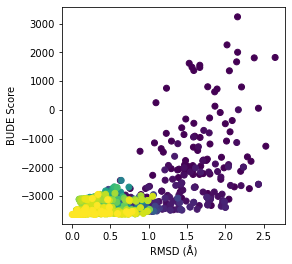

In [15]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUDE Score')

fig.savefig('ga.png')

In [16]:
f = open('d_CC-Di_hexamer-optimized-model-ga.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_ga.pdb)

### Differential Evolution

In [17]:
opt_de = ev_opts.DE(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [18]:
opt_de.run_opt(100, 30, cores=8)

gen	evals	avg     	std   	min     	max    
0  	100  	-2335.71	963.44	-3610.72	918.048
1  	100  	-2862.7 	588.381	-3610.72	-585.981
2  	100  	-3073.93	487.157	-3610.72	-585.981
3  	100  	-3265.9 	275.019	-3610.72	-1438.37
4  	100  	-3381.77	145.411	-3610.72	-2974.53
5  	100  	-3453.01	102.986	-3611.42	-3149.08
6  	100  	-3496.21	84.3274	-3612.04	-3149.08
7  	100  	-3530.23	56.467 	-3612.04	-3374.66
8  	100  	-3550.91	50.9233	-3628.8 	-3386.55
9  	100  	-3568.24	42.5216	-3628.8 	-3429.29
10 	100  	-3582.84	35.1199	-3628.8 	-3457.47
11 	100  	-3591.33	29.0663	-3628.8 	-3457.47
12 	100  	-3604.48	15.0001	-3633.3 	-3538.1 
13 	100  	-3610.19	11.1192	-3639.25	-3579.11
14 	100  	-3613.87	9.255  	-3639.25	-3579.11
15 	100  	-3616.84	8.41238	-3639.25	-3579.11
16 	100  	-3618.9 	8.36419	-3639.75	-3592.51
17 	100  	-3620.25	8.61493	-3639.75	-3592.51
18 	100  	-3623.04	7.49585	-3639.75	-3604.72
19 	100  	-3624.8 	6.99625	-3639.75	-3609.11
20 	100  	-3627.28	6.62408	-3639.75	-3609.11
21 	100  	-362

In [19]:
optimized_model_de = opt_de.best_model
budeff.get_internal_energy(optimized_model_de).total_energy

-3641.2322371918235

In [20]:
funnel_data_de = opt_de.make_energy_funnel_data()

In [21]:
xs = [x[0] for x in funnel_data_de]
ys = [x[1] for x in funnel_data_de]
zs = [x[2] for x in funnel_data_de]

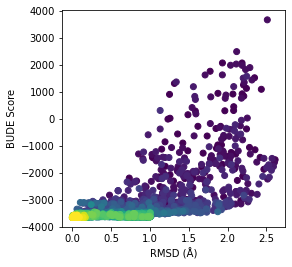

In [22]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUDE Score')

fig.savefig('de.png')

In [23]:
f = open('d_CC-Di_hexamer-optimized-model-de.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_de.pdb)

### Particle Swarm Optimisation

In [24]:
opt_pso = ev_opts.PSO(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [25]:
opt_pso.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max   
0  	100  	-2493.07	1117.88	-3542.01	1689.6
1  	66   	-2851.84	690.555	-3609.21	1104.87
2  	50   	-2812.63	711.723	-3546.35	1431   
3  	66   	-2942.67	538.158	-3561.66	-430.915
4  	79   	-2740.65	982.277	-3538.78	1399.1  
5  	52   	-2835.55	730.389	-3598.17	845.603 
6  	50   	-2932.75	692.938	-3528.06	2478.62 
7  	71   	-2960.91	673.656	-3591.37	680.686 
8  	68   	-2871.46	817.28 	-3550.3 	1467.97 
9  	71   	-2968.82	450.188	-3622.18	-1446.56
10 	63   	-2824.51	810.665	-3570.78	806.529 
11 	65   	-2936.67	725.049	-3575.16	635.123 
12 	60   	-2990.31	706.672	-3569.59	635.123 
13 	62   	-3041.04	624.774	-3625.83	247.399 
14 	72   	-2959.24	561.309	-3615.94	362.553 
15 	84   	-2884.93	856.567	-3571.99	1562.35 
16 	72   	-2919.12	763.983	-3607.17	664.447 
17 	49   	-3028.17	527.987	-3599.89	-510.319
18 	66   	-2811.65	805.583	-3551.02	1646.04 
19 	89   	-2908.25	736.452	-3581.71	93.2839 
20 	69   	-2911.32	639.429	-3575.11	220.33  
21 	41   	-2948.

In [26]:
optimized_model_pso = opt_pso.best_model
budeff.get_internal_energy(optimized_model_pso).total_energy

-3625.831793267531

In [27]:
funnel_data_pso = opt_pso.make_energy_funnel_data()

In [28]:
xs = [x[0] for x in funnel_data_pso]
ys = [x[1] for x in funnel_data_pso]
zs = [x[2] for x in funnel_data_pso]

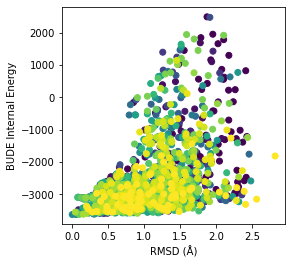

In [29]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUDE Internal Energy')

fig.savefig('pso.png')

In [30]:
f = open('d_CC-Di_hexamer-optimized-model-pso.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_pso.pdb)

### Covariance Matrix Adaptive Evolutionary Strategy

In [31]:
opt_cmaes = ev_opts.CMAES(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [32]:
opt_cmaes.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max    
0  	100  	-1418.74	1496.56	-3360.49	2797.92
1  	100  	-1871.62	1638.82	-3609.03	2665.96
2  	100  	-2704.6 	1228.11	-3546.4 	2067.99
3  	100  	-3344.51	180.725	-3609.15	-2362.25
4  	100  	-3442.99	146.762	-3619.23	-2960.11
5  	100  	-3479.25	134.732	-3615.84	-2942.8 
6  	100  	-3525.01	95.4612	-3632.99	-3098.81
7  	100  	-3579.74	39.9272	-3633.79	-3429.16
8  	100  	-3601.3 	19.7978	-3626.93	-3525.73
9  	100  	-3583.07	40.3198	-3628.32	-3465.59
10 	100  	-3601.05	25.4814	-3632.28	-3524.18
11 	100  	-3570.28	61.9012	-3634.42	-3169.55
12 	100  	-3584.02	38.484 	-3634.46	-3496.17
13 	100  	-3595.37	36.1642	-3635.85	-3494.04
14 	100  	-3589.33	42.607 	-3634.18	-3492.96
15 	100  	-3618.9 	23.517 	-3637.82	-3524.39
16 	100  	-3611.84	30.3368	-3638.75	-3551.39
17 	100  	-3621.06	24.7785	-3640.67	-3556.72
18 	100  	-3617.14	30.657 	-3641   	-3551.1 
19 	100  	-3631.91	19.2158	-3640.63	-3559.11
20 	100  	-3620.16	32.8003	-3641.31	-3559.31
21 	100  	-362

In [33]:
optimized_model_cmaes = opt_cmaes.best_model
budeff.get_internal_energy(optimized_model_cmaes).total_energy

-3641.843756902235

In [34]:
funnel_data_cmaes = opt_cmaes.make_energy_funnel_data()

In [35]:
xs = [x[0] for x in funnel_data_cmaes]
ys = [x[1] for x in funnel_data_cmaes]
zs = [x[2] for x in funnel_data_cmaes]

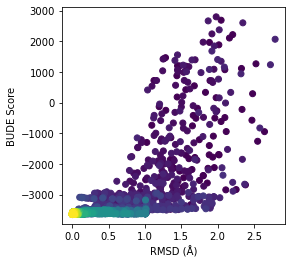

In [36]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUDE Score')

fig.savefig('cmaes.png')

In [37]:
f = open('d_CC-Di_hexamer-optimized-model-cmaes.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_cmaes.pdb)